# IMPORT LIBRARY


---


1. Numpy adalah library python yang berisi fundamental kumputasional ilmiah seperti N dimensional array objek, fungsi matematika (aljabar,  deret fourier dan angkar random).
2. Matplotlib adalah library untuk membuat plot 2 dimensi yang menghasikan visualisasi dari angka-angka atau satistika dengan berbagai format
3. Keras adalah open-source neural-network atau deep learning library yang dibuat dengan python oleh manusia bukan mesin.

In [ ]:
import numpy as np #library array
import matplotlib.pyplot as plt #library plot/sumbu x,y

from keras.layers import Dense #import library layer
from keras.datasets import mnist #import library default dataset
from keras.models import Model #import library Model
from keras.models import Sequential #import fungsi Sequential

from sklearn.metrics import confusion_matrix #import Confusion Matrix function

import itertools #fungsi iterasi membuat looping menjadi efisien

# DATA COLLECTION

---

adalah proses mengumpulkan dan memastikan informasi pada variable of interest (subjek yang akan dilakukan uji coba), dengan cara yang sistematis yang memungkinkan seseorang dapat menjawab pertanyaan dari uji coba yang dilakukan, uji hipotesis, dan mengevaluasi hasil.
> Data yang dipakai adalah data MNIST


> Mnist adalah database yang berisi kumpulan digits angka dengan tulisan tangan.
Kelas atau label dalam data ini berjumlah 10 dari angka 0 sampai dengan 9

In [ ]:
(x_train, y_train), (x_test, y_test)  = mnist.load_data() #load dataset

# DATA PREPORCESSING


---

adalah teknik data mining untuk mengubah raw data atau data kotor menjadi data yang dapat diolah sehingga data tersebut dapat dimengerti


> Data yang dipakai merupakan gambar yang direpresentasikan menjadi multi dimensional array


> Data MNIST adalah data yang sudah bersih dan dapat dipakai sehingga hanya diperlukan sedikit teknik untuk merapihkan data tersebut

> MNIST (Modified National Institute of Standards and Technology database) merupakan database yang berisi kumpulan tulisan tangan yang biasa digunakan untuk data latih pada image processing.

> Data tersebut merupakan greyscale image dimana citra memiliki skala keabuan dengan kedalaman / depth = 1



In [ ]:
print('Data shape atau dimensi data : (Jumlah data, Tinggi piksel, Lebar piksel)', x_train.shape)
print('Bentuk dari isi data : \n')
x_train[3]

Data shape atau dimensi data : (Jumlah data, Tinggi piksel, Lebar piksel) (60000, 28, 28)
Bentuk dari isi data : 



array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

**RESHAPE**
> Mengubah dimensi x_train menjadi 2 dimensi (jumlah data, vektor perkalian piksel)



In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0],784))

In [ ]:
print('Data yang diubah menjadi 2 dimensi :')
x_train[1] #hasil reshape

Data yang diubah menjadi 2 dimensi :


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

**NORMALISASI**

> Teknik pengolahan data untuk menghilangkan dan mengurangi redudansi data



In [ ]:
#Normalisasi tingkat kecerahan (0-255) menjadi (0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

**to_categorical**

> Membuat label dari setiap folder menjadi kategori dengan proses one-hot encoding

> One-hot encoding adalah proses encode label dari String atau Numerik menjadi Kategori dalam bentuk one-hot vector


> Bertujuan untuk membuat label dapat digunakan dalam ML algorithm






In [ ]:
from keras.utils import to_categorical #membuat label folder dataset menjadi kategori / kelas-kelas

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# MODELLING


---


adalah proses membangun sebuah model deep learning.


> Dalam proses membuat model, pertemuan ini dituntut untuk membuat model dari neural network dengan beberapa layer yang disebut juga MLP (Multi Layer Perceptron)

![teks alternatif](https://www.mathworks.com/content/mathworks/www/en/discovery/deep-learning/jcr:content/mainParsys/band_2123350969_copy_1983242569/mainParsys/columns_1635259577/1/image_2128876021_cop_1731669336.adapt.full.high.svg/1559574988729.svg)

> Inisialisasi variable input untuk layer input dengan 1 dimensi berupa vektor, kemudian diteruskan kedalam 2 hidden layers dan diklasifikasi oleh output layer.


> Model yang dibentuk merupakan model yang berjalan secara Sequential. Model sequential adalah tumpukan layer secara linear





In [ ]:
num_input = 28*28 #jumlah input vektor

model = Sequential() #membuat model berurutan
model.add(Dense(500, input_dim=num_input, activation ='relu'))
model.add(Dense(500, activation ='relu'))
#untuk input data sebanyak num_input= 28*28=784 vektor terhadap hidden layer 500 vektor, menggunakan fungsi aktivasi relu
model.add(Dense(10, activation='softmax'))
#untuk output sebanyak 10 (0-9) secara kategori dan menggunakan softmax = sigmoid tapi output lebih banyak

model.compile(loss='categorical_crossentropy', #mengukur informasi yang hilang
             optimizer='adam', #pengaturan learning rate
             metrics=['accuracy']) #membuat melatih akurasi data


W0817 18:21:02.454258 140618681591680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0817 18:21:02.480195 140618681591680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 18:21:02.484910 140618681591680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0817 18:21:02.518748 140618681591680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0817 18:21:02.547035 140618681591680 deprecation_wrappe

**TRAINING MODEL**

In [ ]:
hist = model.fit(x_train, y_train, #melatih data latih(x) dan target(y)
                epochs = 15, #jumlah looping read data
                batch_size = 200, #jumlah data yang diinput
                validation_data=(x_test,y_test)) #melatih data validasi untuk menguji data tersebut sesuai apa tidak

W0817 18:21:02.681912 140618681591680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0817 18:21:02.740696 140618681591680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 68us/step - loss: 0.3121 - acc: 0.9133 - val_loss: 0.1595 - val_acc: 0.9540
Epoch 2/15
60000/60000 [==============================] - 4s 64us/step - loss: 0.1274 - acc: 0.9638 - val_loss: 0.1047 - val_acc: 0.9681
Epoch 3/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.0854 - acc: 0.9750 - val_loss: 0.0842 - val_acc: 0.9733
Epoch 4/15
60000/60000 [==============================] - 4s 63us/step - loss: 0.0603 - acc: 0.9828 - val_loss: 0.0846 - val_acc: 0.9741
Epoch 5/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.0466 - acc: 0.9869 - val_loss: 0.0756 - val_acc: 0.9756
Epoch 6/15
60000/60000 [==============================] - 4s 63us/step - loss: 0.0361 - acc: 0.9898 - val_loss: 0.0719 - val_acc: 0.9782
Epoch 7/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.0270 - acc: 0.9930 - val_loss: 0.0661 - val_acc

In [ ]:
model.save_weights('model_weights.h5') #Menyimpan hasil prediksi model

# MODEL EVALUTION


---

> Merupakan proses mengevaluasi model

> Teknik yang digunakan dalam proses mengevaluasi model adalah ROC dan Confusion Matrix, pertemuan ini kita menggunakan Confusion Matrix.

> Confusion Matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi.

> Berikut merupakan gambaran Confusion Matrix pada Binary Classification :
![teks alternatif](https://miro.medium.com/max/630/1*sJJZnGduFsNxlqWLMsrmBw.png)

> Untuk Multi-Classification class sendiri memiliki rumus sebagai berikut :
![teks alternatif](http://achmatim.net/wp-content/uploads/2017/03/rumus-akurasi-2.png)

> dimana :
1. TPi adalah True Positive, yaitu jumlah data positif yang terklasifikasi dengan benar oleh sistem untuk kelas ke-i.
2. TNi adalah True Negative, yaitu jumlah data negatif yang terklasifikasi dengan benar oleh sistem untuk kelas ke-i.
3. FNi adalah False Negative, yaitu jumlah data negatif namun terklasifikasi salah oleh sistem untuk kelas ke-i.
3. FPi adalah False Positive, yaitu jumlah data positif namun terklasifikasi salah oleh sistem untuk kelas ke-i
4. i adalah jumlah kelas.


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.grid('off')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


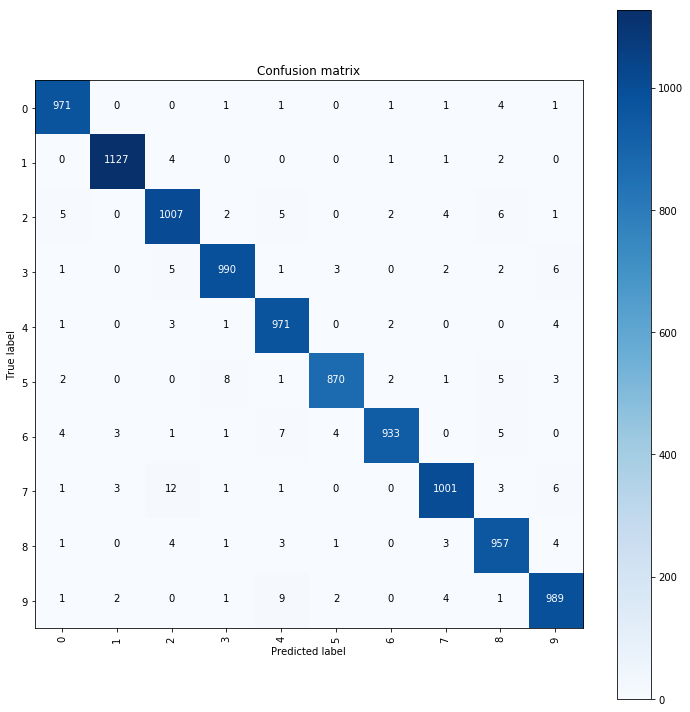

In [ ]:
list_classes = [0,1,2,3,4,5,6,7,8,9]
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(y_test, axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = list_classes)

**MANUAL EVALUTATION**


---

Mengevaluasi model secara manual

In [ ]:
img = x_test[8888] #index data, data ke 8888
predicted = model.predict(np.reshape(img, (1,784))) #data yang ditest direshape

In [ ]:
predicted #melihat probabilitas data sesuai katergori (jumlah 10 kelas)

array([[6.5205071e-11, 1.8495199e-13, 3.7522088e-09, 1.9241707e-11,
        3.8608238e-07, 2.0215853e-11, 9.9999964e-01, 3.7142575e-16,
        5.2926831e-13, 2.1751109e-16]], dtype=float32)

In [ ]:
predictednumber = np.argmax(predicted) #mengambil probabilitas tertinggi

In [ ]:
predictednumber #hasil nilai yang diprediksi

6

In [ ]:
np.argmax(y_test[8888]) #menampilkan label output/ truth label dari data test dengan index 8888

6

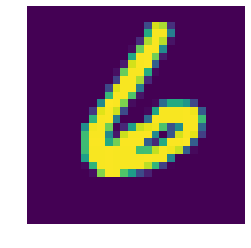

In [ ]:
plt.imshow(np.reshape(x_test[8888], (28,28))) #menampilkan plot/sumbu gambar
plt.axis('off')#menghilangkan sumbu x dan y
plt.show()